# Lecture 22: Querying

### Please note: This lecture will be recorded and made available for viewing online. If you do not wish to be recorded, please adjust your camera settings accordingly. 

# Reminders/Announcements:
- Assignment 8 is due Thursday at 8pm Pacific
- "Course Review" CAPE

## Information Retrieval

Imagine you have a large database of "things"
- Encyclopedia entries (Wikipedia)
- Images (Google Images)
- Videos (YouTube)
- Products (Amazon)
- ...

How can you efficiently *search* that database? Let's take a quick detour to Wikipedia!

What's going on here? *Very loosely speaking* there are a few steps that Wikipedia is using:

![](query.png)

In general searching databases is *incredibly important*. Having a database is useless if you cannot get your customers access to it! In general you want to:
- Provide *relevant information* to the customer's search
- Avoid "dead ends"
- Get results *quickly*
- ...

## Precision, Recall, and F-scores

There are several ways to measure the "success" of an information retrieval system.

Define a *relevant document* to be a document which *should be* retrieved by a query, and an *irrelevant document* to be one which *should not be* retrieved by a query. In general there are some blurred edges between these categories, but let's pretend everything is one of these two categories.
- For example, in the "cow" search above, we would have 
    - "cattle" as a relevant document (also things like "beef," "cowboy," "dairy")
    - "bananas" as an irrelevant document (also things like "soccer," "moon," "volcano")

The *recall* of an IR system for a query is
$$
\text{recall} = \frac{\text{ number of relevant documents retrieved }}{\text{ total number of relevant documents }}
$$
The *precision* of an IR system for a query is 
$$
\text{precision} = \frac{\text{ number of relevant documents retrieved }}{\text{ total number of retrieved documents }}
$$

In any IR system there is a "tradeoff" between precision and recall. Perfect recall can be achieved by retrieving *every document in the system!* Near perfect precision can be achieved by retrieving *very few documents*:

![](pr.png)

Frequently one will use the threshold which maximizes the *F-score*, which is the *harmonic mean* of precision and recall:
$$
F = \frac{2\cdot\text{precision}\cdot\text{recall}}{\text{precision}+\text{recall}}
$$ 

(By the way; these same metrics are used to evaluate those classifier algorithms we talked about previously!)

## ******** Participation Check ******************************
Suppose a search system had the property that its *precision* always equaled *1-recall^2*. Plot the precision/recall graph for this system. Approximately what values of precision and recall would maximize the F-score for this system?

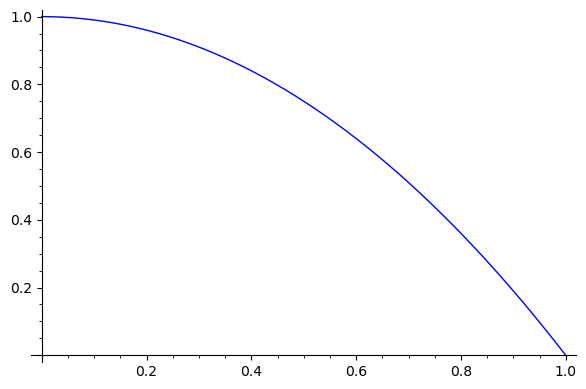

In [3]:
# Your code here
plot(1-x^2, (0,1))

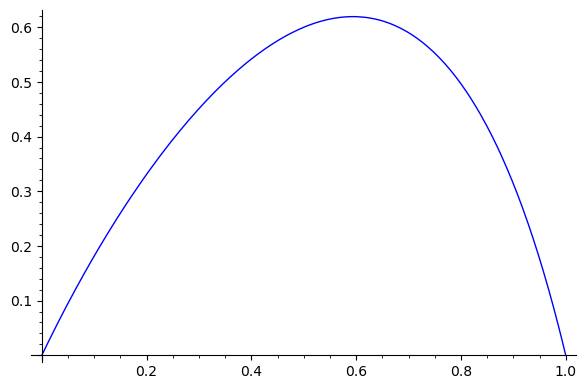

In [2]:
F = 2*x*(1-x^2)/(x+1-x^2)
plot(F,(0,1))

In [4]:
recall = .6
prec = 1-recall^2
prec

0.640000000000000

## *****************************************************************

Of course in a business there are also other metrics of interest. These are often called "online metrics" and include things like:
- Session abandonment rate (how frequently do users give up the search and leave your site)
- Click-thru rate (how frequently users actually click on a result)
- Zero result rate (how many dead ends you get)
- Generic "success rates" (how big is the average purchase, ...)

## Improving Recall with Query Expansion

One method for improving the recall of a system is *query expansion*. For now let's imagine we have a *very simple* database. The items of interest will be Wikipedia pages, and our search will return an article if the query *matches the title of an article* exactly. 

The idea of query expansion is to take a user's query and *expand or alter it* so that it returns better results. Let's go back to the "cow" example above. The article we were probably interested in was the "cattle" article. Without query expansion, this article would not have been returned!

![](coqw.png)

How can we improve our recall here? We could look at *similar words*! One way we can do this is just using standard rules. We could:
- Pluralize/depluralize (cow <-> cows)
- Look at synonyms (cows <-> cattle)
- Look at *hypernyms or hyponyms* (cow <-> mammal)
- Stem (fish <-> fishing)
    - Let's take a look! https://9ol.es/porter_js_demo.html
    - https://tartarus.org/martin/PorterStemmer/def.txt
- Discard "unimportant" words (a cow <-> cow)
- ....

We could also try to use our word vectors!

In [5]:
from gensim.models import KeyedVectors
path = '/home/user/gensim-data/glove-wiki-gigaword-50/glove-wiki-gigaword-50.gz'
glove_vectors = KeyedVectors.load_word2vec_format(path)

In [6]:
glove_vectors.most_similar('cow')

[('pig', 0.8290977478027344),
 ('cows', 0.8151975274085999),
 ('sheep', 0.8077231049537659),
 ('bovine', 0.8016780018806458),
 ('cattle', 0.7895810604095459),
 ('pigs', 0.7748671770095825),
 ('mad', 0.7608286738395691),
 ('chickens', 0.7410693168640137),
 ('cloned', 0.7392407655715942),
 ('bird', 0.7354094386100769)]

Using query expansion we could turn a single query into a *list of queries*:

![](qe.png)

And this will improve our recall! Of course, we have to be careful that we don't drastically lower our precision by doing this. If we went by our similar word vectors we might throw out "bird" or "cloned" which could be a surprising result; this can be improved on by ranking the search using other techniques which are out of the scope of this class. 

## Tags and Taxonomy

Another common technique of improving recall is to "taxonomize" your data. This comes from the biological field of *taxonomy*. For example: what we know as the *blue whale* has the following classification:
- Kingdom: Animalia (animals)
- Phylum: Chordata (chordates)
- Class: Mammalia (mammals)
- Order: Artiodactyla (even toed ungulates, biology is wild)
- Suborder: Cetacea (aquatic mammals)
- Family: Balaenopteridae (large baleen whales)
- Genus: Balaenoptera (winged whale, referring to the dorsal fin)
- Species: B. Musculus (either "muscular" or "little mouse")

The idea here is that as you move down in taxonomy you are "more and more" similar as life forms. For example, the Kingdom group contains (essentially) animals, plants, fungi, protists, and bacteria.

This idea is very fruitful, as it allows for grouping of data by several classes. For example: suppose you were selling groceries. One of your products might be "Chobani vanilla greek yogurt." You could classify this as (something like)
- Type of grocery item: food (as opposed to something like cleaning supplies)
- Type of food: dairy
- Type of dairy: yogurt
- Brand: Chobani
- Flavor: vanilla

The point is that now if someone searches for "Chobani vanilla Greek yogurt" and you *don't have* Chobani vanilla Greek yogurt, you have a good idea of what to *replace it with*. For example, you may try "Yoplait vanilla yogurt" or "Chobani strawberry Greek yogurt", etc.

With something like a YouTube video search this is also possible, although it can be a bit trickier. One way is to use *tags*. For example, when an individual uploads a video to YouTube they can supply several tags, such as "comedy," "cooking," "travel," etc. This would allow a *very specific video* to be hit by a *quite general* search: instead of matching the title exactly, they could try to match one of the tags. For example, searching "Funny Video" may lead you to a comedy special of a specific comedian. YouTube parses "funny video" and sees that this could be related to "comedy;" then it can search for videos with the comedy tag that might interest you:

![](burr.png)

## Spelling! A Case Study from Instacart

Another *very important* thing to consider in practice is spelling! How many of you use perfect spelling when you look for things online? This is an issue that Instacart had to deal with; they recently blogged about the technical tools that went into their solution here: https://tech.instacart.com/avacado-or-avocado-4b4b78dc0698 

Let's take a look at what they did!

Here are a few common items that Instacart found were "hard" to spell. How many can you spell perfectly?

![](spell.png)

They are:
- zucchini
- cantaloupe
- sriracha
- avocado

Misspelled words are difficult for computers to deal with; not only will they not match any item in the database, they will also not be recognized by query expansion techniques:

In [7]:
glove_vectors.most_similar('avacado')

KeyError: "word 'avacado' not in vocabulary"

Not only this; what if they misspell a word which *ends up* being a correctly spelled different word? For example, maybe they meant to type in "lime" but accidentally typed in "line"

Instacart had loads of user data on this and decided the first issue to focus on was "non-word" misspellings, i.e. "avacado" for "avocado."

Instacart modeled their user's search experience as follows:

![](ic.png)

Their goal was to expedite the "reformulate query" process to allow for better recall for queries. To do this they used two tools:

- Historical data
- Levenshtein distances

The historical data consisted of *pairs of consecutive search terms* in which *the second search led to a conversion*. In other words, *historically* their users would simply *correct themselves*. Instacart *keeps track* of these corrections, and pairs up corrections which "occur frequently."

The Levenshtein distance is a metric on words which also allows Instacart to keep track of "how badly" a word was potentially misspelled. Given two strings S and T, we define lev(S,T) as *the minimal number of single character edits required to change the strings into the same string.* Here a *single character edit* is any of:
- a substitution (**c**at -> **b**at)
- a deletion (**c**at -> at)
- an insertion (cat -> c**o**at)

Thus lev(cat,bat) = lev(cat,at) = lev(cat,coat) = 1.

## ***** Participation Check *****************************

Compute the following Levenshtein distances:
- lev(zuchini, zucchini) =1
- lev(mom, pop) = 2
- lev(flaw, lawn) (this one is tricky!) =2

## ****************************************************

There is in fact a module (implemented in fast C code) for doing this, but unfortunately Sage does not have it builtin, and it isn't really worth "downloading" for this class. But, if you ever work on this kind of stuff, you could pip-install it!

In [14]:
#from Levenshtein import distance as levenshtein_distance

## Putting it Together

Instacart combined these two ideas to create a basic query expansion technique. Their main focus was to correct *small misspellings*, so the central technique was to combine their historical data on *misspellings of Levenshtein distance at most 2*. This allows for most of the common "grocery misspellings:"

- avacado -> avocado
- zuchinni -> zucchini
- siracha -> sriracha
- cantalope -> cantaloupe
- ...

That's not all though! Using their historical data, *combined with* objects like word embeddings, they can do even better!

- organic blah -> blah
- canned soup -> soup
- prawns -> shrimp
- cremini -> mushrooms
- ...

In [8]:
glove_vectors.most_similar('prawns')

[('shrimps', 0.8790218830108643),
 ('crabs', 0.8520559072494507),
 ('shrimp', 0.8340020179748535),
 ('clams', 0.826024055480957),
 ('mussels', 0.8159008026123047),
 ('oysters', 0.7958897948265076),
 ('lobsters', 0.7920053005218506),
 ('prawn', 0.7888667583465576),
 ('scallops', 0.7744860053062439),
 ('crab', 0.7705389261245728)]

In [0]:
glove_vectors.most_similar('cremini')

[('shiitake', 0.8481448888778687),
 ('crimini', 0.8366554379463196),
 ('chanterelles', 0.7565174102783203),
 ('porcini', 0.7356021404266357),
 ('mushrooms', 0.7030697464942932),
 ('portabello', 0.6983159184455872),
 ('puffballs', 0.678311288356781),
 ('privet', 0.6753736734390259),
 ('chanterelle', 0.6700891256332397),
 ('morels', 0.6689531207084656)]

Let's take a look!